#import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style(style='darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system


In [3]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
# Read file - Load data
BankData = pd.read_csv("bank-full.csv")
BankData.head(10) 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


## Deliverable – 1 (Exploratory data quality report reflecting the following)

#Univariate analysis

In [5]:
#shape
BankData.shape

(45211, 17)

In [6]:
#data types, Non null values
BankData.info()

# 17 columns and 45211 rows
# All rows are non-null
# 7 integrers and rest are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#statistical summary - range of values observed, standard deviation and quartiles - Q1 (25%), Q2 (50%), Q3 (75%)
BankData.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [ ]:
##Mean < Medaian (Q2-50%) => -ve skew
#day
##Mean > Medaian (Q2-50%) => +ve skew
#age
#balance
#duration
#campaign
#pdays
#previous

In [8]:
BankData[~BankData['balance'].gt(-1)]['balance'].count()

#3766 clients have negative balance

3766

In [9]:
BankData[~BankData['pdays'].gt(-1)]['pdays'].count()

#36954 clients have not been contacted or contact period is beyond 900 days

36954

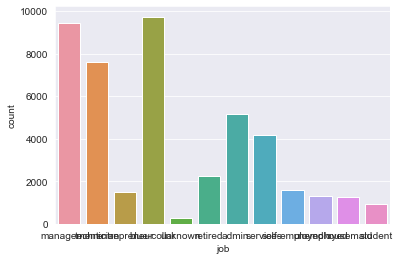

In [10]:
sns.countplot(BankData['job']);

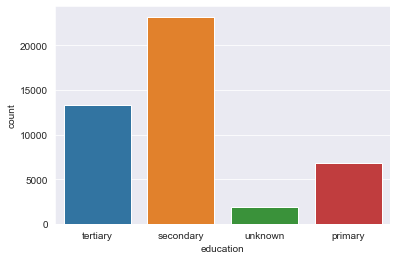

In [11]:
sns.countplot(BankData['education']);

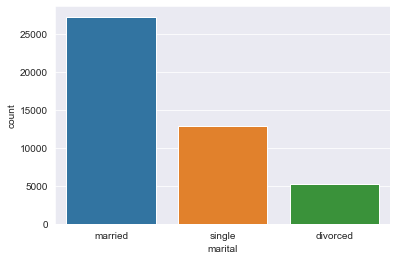

In [12]:
sns.countplot(BankData['marital']);

#Majority of population is married

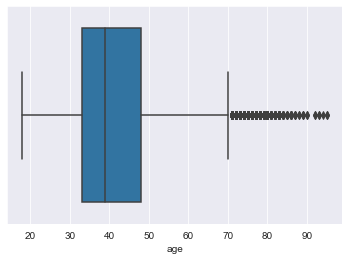

In [13]:
sns.boxplot(BankData['age']);

#Age is positively skewed, There are many outliers

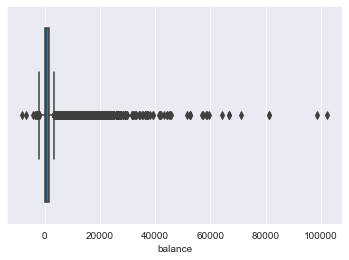

In [14]:
sns.boxplot(BankData['balance']); # there are many Outlier for balance - data needs to be normalized

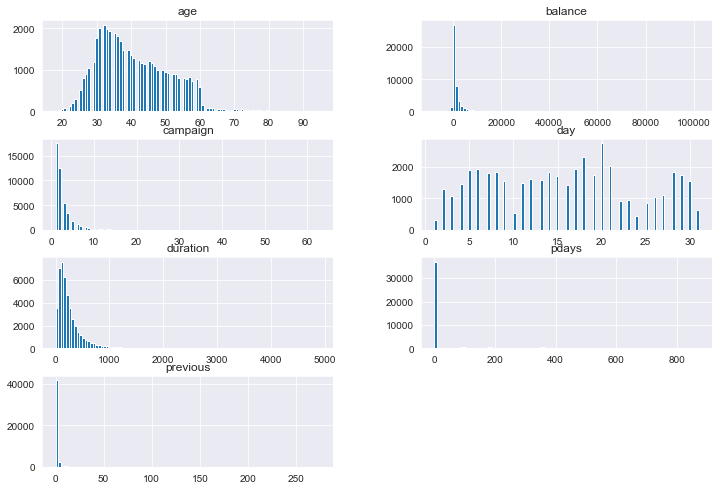

In [15]:
BankData.hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

#Age is positively skewed
#Balance is positively skewed


In [16]:
BankData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [17]:
#Scalling the skewed data using MinMaxScaler

BankData['age'] = MinMaxScaler().fit_transform(BankData[['age']])
BankData['balance'] = MinMaxScaler().fit_transform(BankData[['balance']])
BankData['duration'] = MinMaxScaler().fit_transform(BankData[['duration']])
BankData['pdays'] = MinMaxScaler().fit_transform(BankData[['pdays']])
BankData['previous'] = MinMaxScaler().fit_transform(BankData[['previous']])
BankData['campaign'] = MinMaxScaler().fit_transform(BankData[['campaign']])

In [18]:
BankData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,0.297873,0.137906,0.0,0.194805,0.272727,0.389610,1.0
balance,45211.0,0.085171,0.027643,0.0,0.073457,0.076871,0.085768,1.0
day,45211.0,15.806419,8.322476,1.0,8.000000,16.000000,21.000000,31.0
duration,45211.0,0.052494,0.052364,0.0,0.020943,0.036600,0.064864,1.0
campaign,45211.0,0.028449,0.049968,0.0,0.000000,0.016129,0.032258,1.0
pdays,45211.0,0.047245,0.114827,0.0,0.000000,0.000000,0.000000,1.0
previous,45211.0,0.002110,0.008376,0.0,0.000000,0.000000,0.000000,1.0


#Multivariate analysis

In [19]:
#Converting the Target variable to int for Multivariate analysis
replaceStruct1 = {
                "Target":      {"no": 0, "yes": 1 } 
                 }

In [20]:
BankData=BankData.replace(replaceStruct1)

In [21]:
BankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,0.519481,management,married,tertiary,no,0.092259,yes,no,unknown,5,may,0.053070,0.0,0.0,0.0,unknown,0
1,0.337662,technician,single,secondary,no,0.073067,yes,no,unknown,5,may,0.030704,0.0,0.0,0.0,unknown,0
2,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,5,may,0.015453,0.0,0.0,0.0,unknown,0
3,0.376623,blue-collar,married,unknown,no,0.086476,yes,no,unknown,5,may,0.018707,0.0,0.0,0.0,unknown,0
4,0.194805,unknown,single,unknown,no,0.072812,no,no,unknown,5,may,0.040260,0.0,0.0,0.0,unknown,0


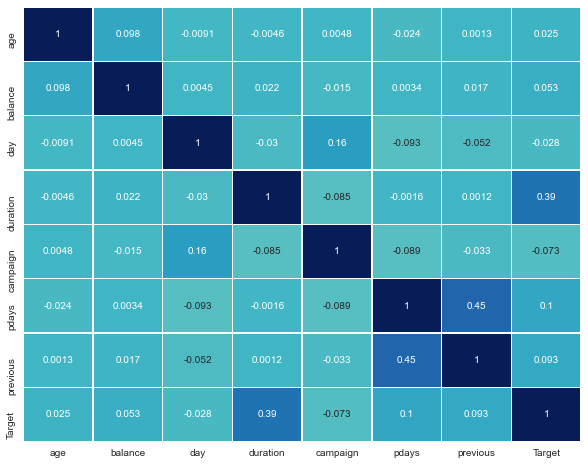

In [22]:
plt.figure(figsize=(10,8))

sns.heatmap(BankData.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [ ]:
#pdays(number of days that passed by after the client was last contacted from a previous campaign) 
#is slightly positively correlated with previous(of contacts performed before this campaign and for this client)

#Target is slightly positively correlated with duration

#not much correlation

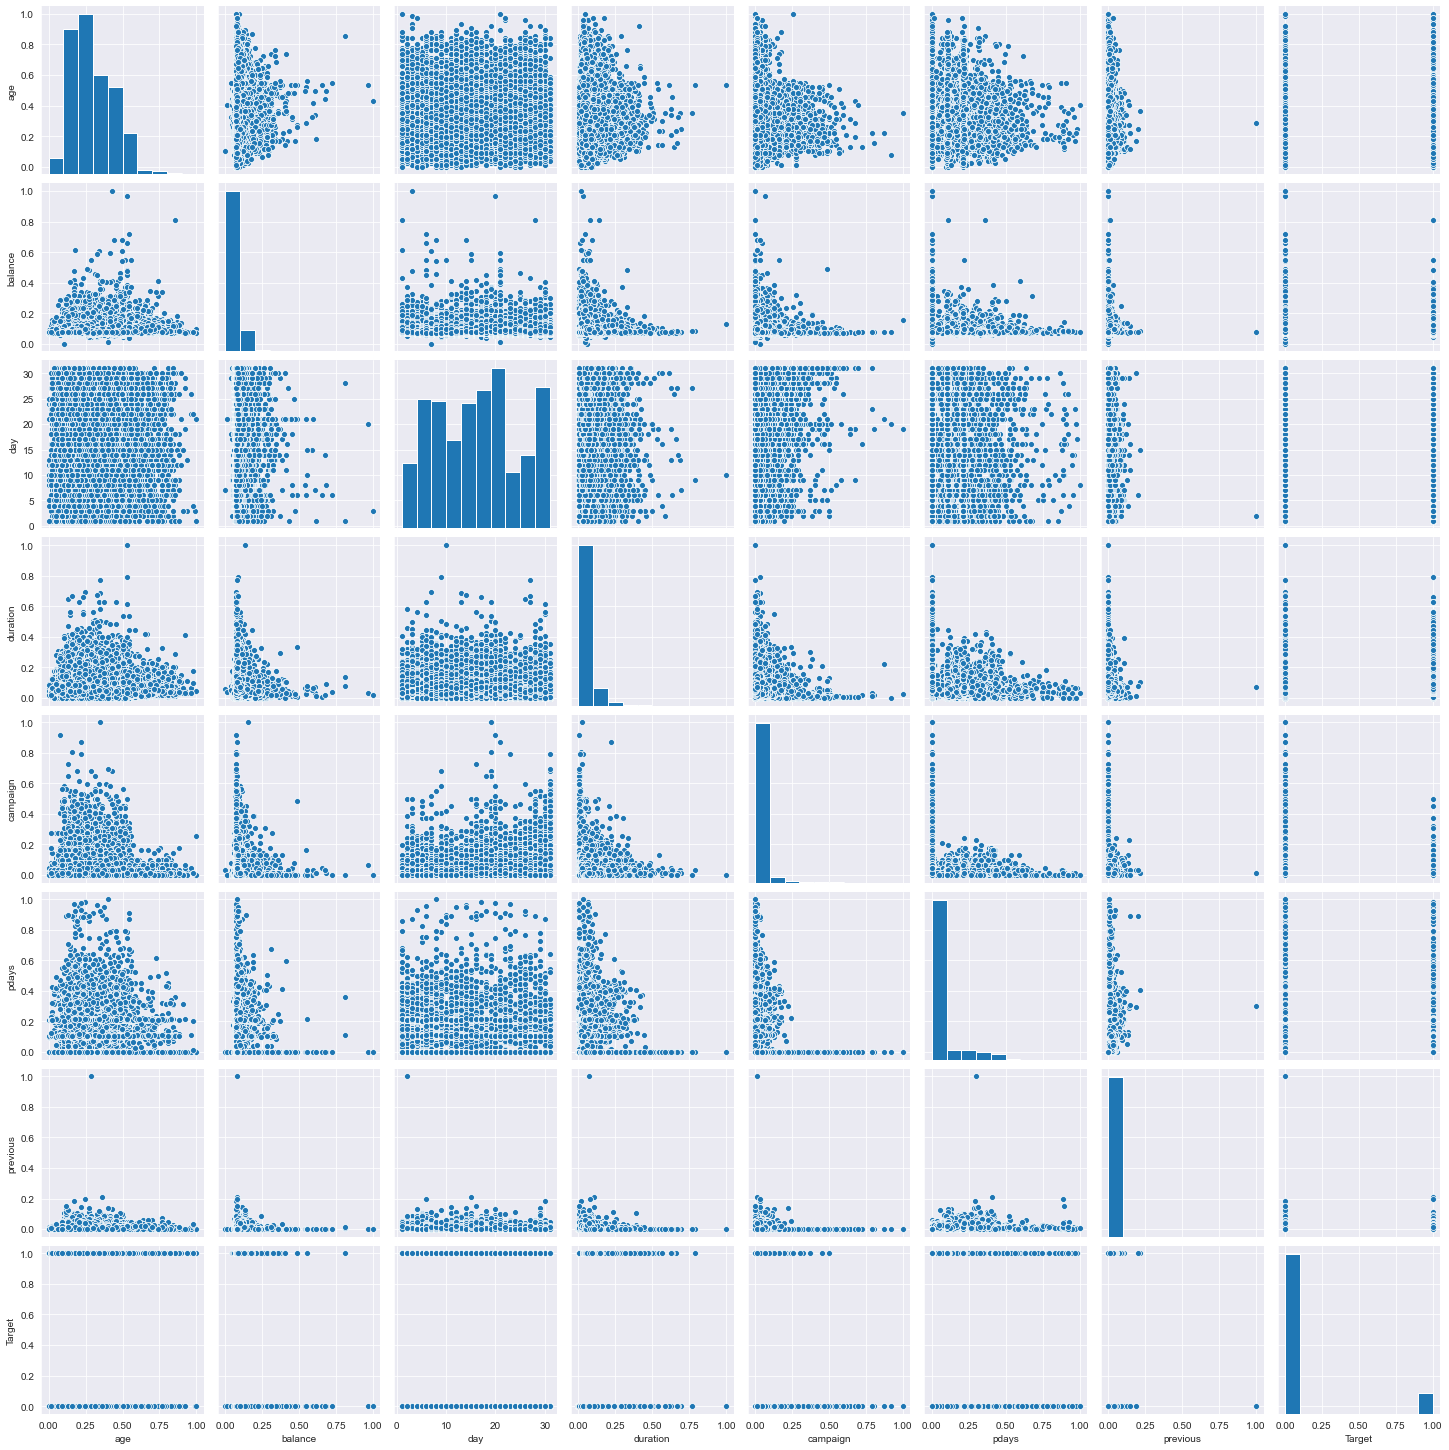

In [23]:
sns.pairplot(BankData);

#Deliverable – 2 (Prepare the data for analytics)

In [ ]:
#Ensure the attribute types are correct. If not, take appropriate actionssca

In [24]:
BankData.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
Target         int64
dtype: object

In [25]:
for feature in BankData.columns: # Loop through all columns in the dataframe
    if BankData[feature].dtype == 'object': # Only apply for columns with categorical strings
        BankData[feature] = pd.Categorical(BankData[feature])# Replace strings with an integer
BankData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,0.519481,management,married,tertiary,no,0.092259,yes,no,unknown,5,may,0.053070,0.0,0.0,0.0,unknown,0
1,0.337662,technician,single,secondary,no,0.073067,yes,no,unknown,5,may,0.030704,0.0,0.0,0.0,unknown,0
2,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,5,may,0.015453,0.0,0.0,0.0,unknown,0
3,0.376623,blue-collar,married,unknown,no,0.086476,yes,no,unknown,5,may,0.018707,0.0,0.0,0.0,unknown,0
4,0.194805,unknown,single,unknown,no,0.072812,no,no,unknown,5,may,0.040260,0.0,0.0,0.0,unknown,0
5,0.220779,management,married,tertiary,no,0.074901,yes,no,unknown,5,may,0.028264,0.0,0.0,0.0,unknown,0
6,0.129870,management,single,tertiary,no,0.076862,yes,yes,unknown,5,may,0.044124,0.0,0.0,0.0,unknown,0
7,0.311688,entrepreneur,divorced,tertiary,yes,0.072822,yes,no,unknown,5,may,0.077267,0.0,0.0,0.0,unknown,0
8,0.519481,retired,married,primary,no,0.073902,yes,no,unknown,5,may,0.010167,0.0,0.0,0.0,unknown,0
9,0.324675,technician,single,secondary,no,0.078187,yes,no,unknown,5,may,0.011183,0.0,0.0,0.0,unknown,0


In [26]:
BankData.dtypes

age           float64
job          category
marital      category
education    category
default      category
balance       float64
housing      category
loan         category
contact      category
day             int64
month        category
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome     category
Target          int64
dtype: object

In [27]:
print(BankData.job.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


In [28]:
print(BankData.marital.value_counts())

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


In [29]:
print(BankData.education.value_counts(),'\n')
print(BankData.default.value_counts(),'\n')
print(BankData.housing.value_counts(),'\n')
print(BankData.loan.value_counts(),'\n')
print(BankData.contact.value_counts(),'\n')
print(BankData.month.value_counts(),'\n')
print(BankData.poutcome.value_counts(),'\n')


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int64 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64 



In [30]:
replaceStruct = {
                "default":     {"no": 0, "yes": 1 }, 
                "housing":     {"no": 0, "yes": 1 },
                "loan":        {"no": 0, "yes": 1 },
                "education":   {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown":-1},
                "poutcome":    {"failure": 1, "other": 2 ,"success": 3 ,"unknown":-1},
                "marital":     {"single": 1, "married": 2 ,"divorced": 3},
                "month":       {"jan": 1, "feb": 2 ,"mar": 3 ,"apr": 4 , "may": 5, "jun": 6 ,"jul": 7 ,"aug": 8 ,
                                "sep": 9, "oct": 10 ,"nov": 11 ,"dec": 12 }
                    }
oneHotCols=["job","contact"]

In [31]:
BankData=BankData.replace(replaceStruct)
BankData=pd.get_dummies(BankData, columns=oneHotCols)
BankData.head(10)


,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown
0,0.519481,2,3,0,0.092259,1,0,5,5,0.053070,...,0,0,0,0,0,0,0,0,0,1
1,0.337662,1,2,0,0.073067,1,0,5,5,0.030704,...,0,0,0,0,1,0,0,0,0,1
2,0.194805,2,2,0,0.072822,1,1,5,5,0.015453,...,0,0,0,0,0,0,0,0,0,1
3,0.376623,2,-1,0,0.086476,1,0,5,5,0.018707,...,0,0,0,0,0,0,0,0,0,1
4,0.194805,1,-1,0,0.072812,0,0,5,5,0.040260,...,0,0,0,0,0,0,1,0,0,1
5,0.220779,2,3,0,0.074901,1,0,5,5,0.028264,...,0,0,0,0,0,0,0,0,0,1
6,0.129870,1,3,0,0.076862,1,1,5,5,0.044124,...,0,0,0,0,0,0,0,0,0,1
7,0.311688,3,3,1,0.072822,1,0,5,5,0.077267,...,0,0,0,0,0,0,0,0,0,1
8,0.519481,2,1,0,0.073902,1,0,5,5,0.010167,...,1,0,0,0,0,0,0,0,0,1
9,0.324675,1,2,0,0.078187,1,0,5,5,0.011183,...,0,0,0,0,1,0,0,0,0,1


In [32]:
BankData.dtypes

age                  float64
marital                int64
education              int64
default                int64
balance              float64
housing                int64
loan                   int64
day                    int64
month                  int64
duration             float64
campaign             float64
pdays                float64
previous             float64
poutcome               int64
Target                 int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
dtype: object

In [33]:
print(BankData.month.value_counts(),'\n')


5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: month, dtype: int64 



In [34]:
#Incorrect Imputations
BankData[~BankData.applymap(np.isreal).all(1)]

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown


In [ ]:
# Transform the data i.e. scale / normalize if required

In [ ]:
#Data is already normalized above

#Create the training set and test set in ratio of 70:30

In [35]:
X = BankData.drop('Target' , axis=1)
y = BankData['Target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [37]:
X_train.head()

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown
6149,0.181818,2,2,1,0.070643,1,0,27,5,0.086824,...,0,0,0,0,0,0,0,0,0,1
12403,0.207792,1,2,0,0.068464,1,1,27,6,0.022570,...,0,0,0,0,0,0,0,0,0,1
21645,0.181818,2,2,0,0.075218,1,0,19,8,0.034160,...,0,0,0,0,1,0,0,1,0,0
29580,0.233766,2,2,1,0.072921,0,1,3,2,0.030500,...,0,0,0,0,0,0,0,1,0,0
31245,0.064935,1,2,0,0.077216,0,0,3,3,0.017690,...,0,0,0,1,0,0,0,1,0,0


In [38]:
print('Shape of Training Data', X_train.shape)
print('Shape of Testing Data', X_test.shape)

Shape of Training Data (31647, 29)
Shape of Testing Data (13564, 29)


In [39]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(BankData.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(BankData.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [40]:
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(BankData.loc[BankData['Target'] == 1]), (len(BankData.loc[BankData['Target'] == 1])/len(BankData.index)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)".format(len(BankData.loc[BankData['Target'] == 0]), (len(BankData.loc[BankData['Target'] == 0])/len(BankData.index)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Target True Values    : 5289 (11.70%)
Original Target False Values   : 39922 (88.30%)

Training Target True Values    : 3738 (11.81%)
Training Target False Values   : 27909 (88.19%)

Test Target True Values        : 1551 (11.43%)
Test Target False Values       : 12013 (88.57%)



#Deliverable – 3 (create the ensemble model) –

In [ ]:
#Logistic Regression

In [41]:

model = LogisticRegression(random_state=1)  #assigning a variable for the algorithm

model.fit(X_train, y_train) #training of model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_predict = model.predict(X_test)     #model is predicting y values based on test dataset given to the model

Log_Train_Acc = model.score(X_train,y_train)
Log_Test_Acc  = model.score(X_test, y_test)


print("Training accuracy",Log_Train_Acc)  # this will give training accuracy as training data has been used
print()
print("Testing accuracy",Log_Test_Acc)   # this will give testing accuracy as testing data has been used

Training accuracy 0.8974310361171675

Testing accuracy 0.897670303745208


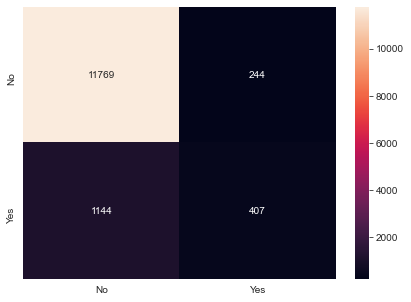

In [43]:
#Confusion Matrics
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [44]:
#Confusion Matrics
print(cm)

[[11769   244]
 [ 1144   407]]


In [45]:

Log_Recall = recall_score(y_test,y_predict)

Log_Precision = precision_score(y_test,y_predict)

Log_F1_Score = f1_score(y_test,y_predict)

Log_ROC = roc_auc_score(y_test,y_predict)

print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Recall: 0.2624113475177305

Precision: 0.6251920122887865

F1 Score: 0.36966394187102636

Roc Auc Score: 0.6210500090622866


In [46]:
print('The confusion matrix for Logistic Regression \n\n')

print('True Positives (TP): we correctly predicted that they will take Term Deposit ', cm[1,1],'\n')

print('True Negatives (TN): we correctly predicted that they don''t take Term Deposit ', cm[0,0],'\n')

print('False Positives (FP): we incorrectly predicted that they will take Term Deposit (a "Type I error") ',cm[1,0] ,' Falsely predict positive Type I error \n')

print('False Negatives (FN): we incorrectly predicted that they don''t take Term Deposit (a "Type II error") ',cm[0,1],' Falsely predict negative Type II error \n')

The confusion matrix for Logistic Regression 


True Positives (TP): we correctly predicted that they will take Term Deposit  407 

True Negatives (TN): we correctly predicted that they dont take Term Deposit  11769 

False Positives (FP): we incorrectly predicted that they will take Term Deposit (a "Type I error")  1144  Falsely predict positive Type I error 

False Negatives (FN): we incorrectly predicted that they dont take Term Deposit (a "Type II error")  244  Falsely predict negative Type II error 



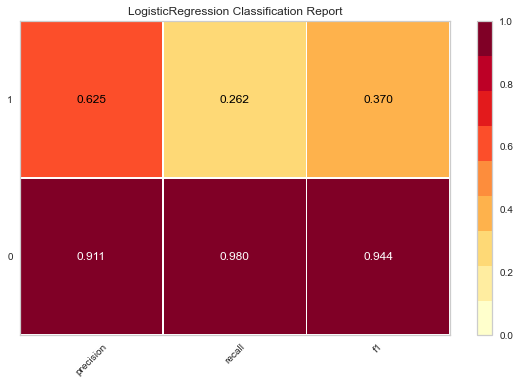

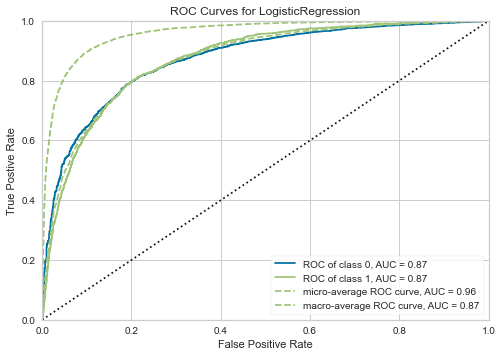

In [47]:
# Logistic Regression

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [48]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': Log_Test_Acc, 'recall': Log_Recall, 
                          'precision': Log_Precision, 'F1score': Log_F1_Score, 'roc': Log_ROC})
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','F1score','roc']]
resultsDf

,Method,accuracy,recall,precision,F1score,roc
0,Logistic Regression,0.89767,0.262411,0.625192,0.369664,0.62105


In [49]:
#Decision Tree

In [50]:
features = [col for col in BankData.columns if col != 'Target']

In [51]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Training accuracy 1.0
Testing accuracy 0.8740784429371866


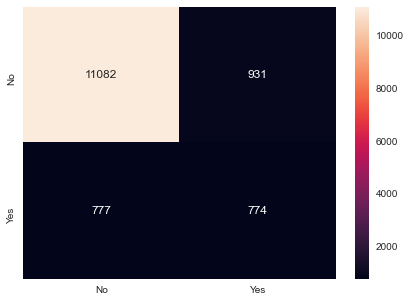

In [52]:
DT_Train_Acc = dTree.score(X_train, y_train)
DT_Test_ACC = dTree.score(X_test , y_test)

print("Training accuracy",DT_Train_Acc)
print("Testing accuracy",DT_Test_ACC)

y_predict = dTree.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [53]:

DT_Recall = recall_score(y_test,y_predict)

DT_Precision = precision_score(y_test,y_predict)

DT_F1_Score = f1_score(y_test,y_predict)

DT_ROC = roc_auc_score(y_test,y_predict)

print("Recall:",DT_Recall)
print()
print("Precision:",DT_Precision)
print()
print("F1 Score:",DT_F1_Score)
print()
print("Roc Auc Score:",DT_ROC)

Recall: 0.4990328820116054

Precision: 0.45395894428152495

F1 Score: 0.47542997542997545

Roc Auc Score: 0.7107667531676273


In [54]:
print('The confusion matrix for Decision Tree \n\n')

print('True Positives (TP): we correctly predicted that they will take Term Deposit ', cm[1,1],'\n')

print('True Negatives (TN): we correctly predicted that they don''t take Term Deposit ', cm[0,0],'\n')

print('False Positives (FP): we incorrectly predicted that they will take Term Deposit (a "Type I error") ',cm[1,0] ,' Falsely predict positive Type I error \n')

print('False Negatives (FN): we incorrectly predicted that they don''t take Term Deposit (a "Type II error") ',cm[0,1],' Falsely predict negative Type II error \n')

The confusion matrix for Decision Tree 


True Positives (TP): we correctly predicted that they will take Term Deposit  774 

True Negatives (TN): we correctly predicted that they dont take Term Deposit  11082 

False Positives (FP): we incorrectly predicted that they will take Term Deposit (a "Type I error")  777  Falsely predict positive Type I error 

False Negatives (FN): we incorrectly predicted that they dont take Term Deposit (a "Type II error")  931  Falsely predict negative Type II error 



In [55]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': DT_Test_ACC, 'recall': DT_Recall, 
                          'precision': DT_Precision, 'F1score': DT_F1_Score, 'roc': DT_ROC})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','F1score','roc']]
resultsDf

,Method,accuracy,recall,precision,F1score,roc
0,Logistic Regression,0.897670,0.262411,0.625192,0.369664,0.621050
0,Decision Tree,0.874078,0.499033,0.453959,0.475430,0.710767


In [ ]:
#Reducing over fitting (Regularization of Decision Tree)

In [56]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)

DTR_Train_Acc = dTreeR.score(X_train, y_train)
DTR_Test_Acc = dTreeR.score(X_test, y_test)

print("Training accuracy",DTR_Train_Acc)
print("Testing accuracy",DTR_Test_Acc)

Training accuracy 0.9005276961481341
Testing accuracy 0.9019463285166618


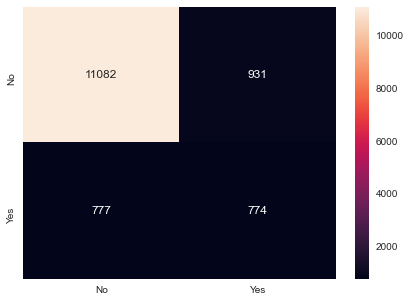

In [57]:

y_predict = dTree.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [58]:
DTR_Recall = recall_score(y_test,y_predict)

DTR_Precision = precision_score(y_test,y_predict)

DTR_F1_Score = f1_score(y_test,y_predict)

DTR_ROC = roc_auc_score(y_test,y_predict)

print("Recall:",DTR_Recall)
print()
print("Precision:",DTR_Precision)
print()
print("F1 Score:",DTR_F1_Score)
print()
print("Roc Auc Score:",DTR_ROC)

Recall: 0.4990328820116054

Precision: 0.45395894428152495

F1 Score: 0.47542997542997545

Roc Auc Score: 0.7107667531676273


In [59]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree-R'], 'accuracy': DTR_Test_Acc, 'recall': DTR_Recall, 
                          'precision': DTR_Precision, 'F1score': DTR_F1_Score, 'roc': DTR_ROC})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','F1score','roc']]
resultsDf

,Method,accuracy,recall,precision,F1score,roc
0,Logistic Regression,0.897670,0.262411,0.625192,0.369664,0.621050
0,Decision Tree,0.874078,0.499033,0.453959,0.475430,0.710767
0,Decision Tree-R,0.901946,0.499033,0.453959,0.475430,0.710767


#Build the ensemble models

In [ ]:
#Bagging

0.9065172515482158
Training accuracy 0.9998104085695326
Testing accuracy 0.9065172515482158
Recall: 0.48936170212765956

Precision: 0.6145748987854251

F1 Score: 0.5448671931083993

Roc Auc Score: 0.7248689805901762
The confusion matrix for Bagging 


True Positives (TP): we correctly predicted that they will take Term Deposit  759 

True Negatives (TN): we correctly predicted that they dont take Term Deposit  11537 

False Positives (FP): we incorrectly predicted that they will take Term Deposit (a "Type I error")  792  Falsely predict positive Type I error 

False Negatives (FN): we incorrectly predicted that they dont take Term Deposit (a "Type II error")  476  Falsely predict negative Type II error 



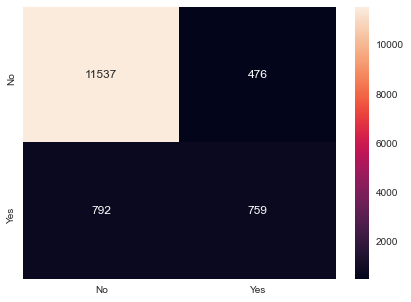

In [60]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Bag_Train_Acc = bgcl.score(X_train, y_train)
Bag_Test_Acc  = bgcl.score(X_test, y_test)

print("Training accuracy",Bag_Train_Acc)
print("Testing accuracy",Bag_Test_Acc)


Bag_Recall = recall_score(y_test,y_predict)

Bag_Precision = precision_score(y_test,y_predict)

Bag_F1_Score = f1_score(y_test,y_predict)

Bag_ROC = roc_auc_score(y_test,y_predict)

print("Recall:",Bag_Recall)
print()
print("Precision:",Bag_Precision)
print()
print("F1 Score:",Bag_F1_Score)
print()
print("Roc Auc Score:",Bag_ROC)

print('The confusion matrix for Bagging \n\n')

print('True Positives (TP): we correctly predicted that they will take Term Deposit ', cm[1,1],'\n')

print('True Negatives (TN): we correctly predicted that they don''t take Term Deposit ', cm[0,0],'\n')

print('False Positives (FP): we incorrectly predicted that they will take Term Deposit (a "Type I error") ',cm[1,0] ,' Falsely predict positive Type I error \n')

print('False Negatives (FN): we incorrectly predicted that they don''t take Term Deposit (a "Type II error") ',cm[0,1],' Falsely predict negative Type II error \n')

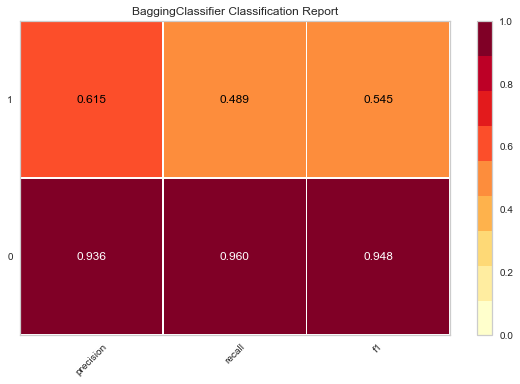

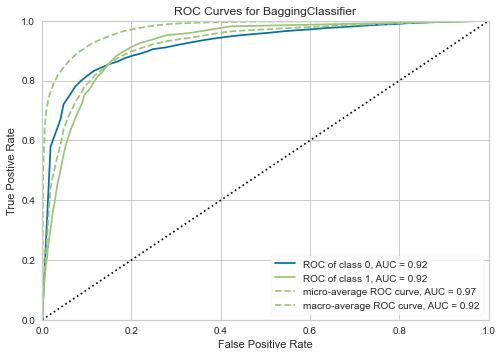

In [61]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, random_state=1))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, random_state=1))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [62]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': bgcl.score(X_test, y_test), 'recall': Bag_Recall, 
                          'precision': Bag_Precision, 'F1score': Bag_F1_Score, 'roc': Bag_ROC})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','F1score','roc']]
resultsDf

,Method,accuracy,recall,precision,F1score,roc
0,Logistic Regression,0.897670,0.262411,0.625192,0.369664,0.621050
0,Decision Tree,0.874078,0.499033,0.453959,0.475430,0.710767
0,Decision Tree-R,0.901946,0.499033,0.453959,0.475430,0.710767
0,Bagging,0.906517,0.489362,0.614575,0.544867,0.724869


In [ ]:
#AdaBoosting

In [63]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier(base_estimator=dTree,n_estimators=10, random_state=1)
AdaBoost = AdaBoost.fit(X_train, y_train)

0.8720141551164848


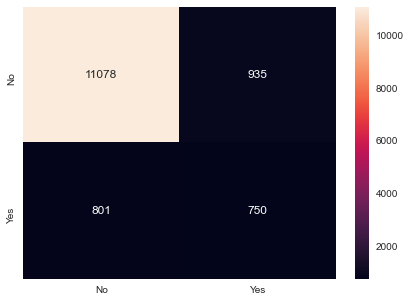

In [64]:
y_predict = AdaBoost.predict(X_test)
print(AdaBoost.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [65]:
print("Training accuracy",AdaBoost.score(X_train, y_train))
print("Testing accuracy",AdaBoost.score(X_test, y_test))

Training accuracy 1.0
Testing accuracy 0.8720141551164848


In [66]:

AdaBoost_Recall = recall_score(y_test,y_predict)

AdaBoost_Precision = precision_score(y_test,y_predict)

AdaBoost_F1_Score = f1_score(y_test,y_predict)

AdaBoost_ROC = roc_auc_score(y_test,y_predict)

print("Recall:",AdaBoost_Recall)
print()
print("Precision:",AdaBoost_Precision)
print()
print("F1 Score:",AdaBoost_F1_Score)
print()
print("Roc Auc Score:",AdaBoost_ROC)

Recall: 0.4835589941972921

Precision: 0.44510385756676557

F1 Score: 0.4635352286773795

Roc Auc Score: 0.7028633229539694


In [67]:
print('The confusion matrix for AdaBoosting \n\n')

print('True Positives (TP): we correctly predicted that they will take Term Deposit ', cm[1,1],'\n')

print('True Negatives (TN): we correctly predicted that they don''t take Term Deposit ', cm[0,0],'\n')

print('False Positives (FP): we incorrectly predicted that they will take Term Deposit (a "Type I error") ',cm[1,0] ,' Falsely predict positive Type I error \n')

print('False Negatives (FN): we incorrectly predicted that they don''t take Term Deposit (a "Type II error") ',cm[0,1],' Falsely predict negative Type II error \n')

The confusion matrix for AdaBoosting 


True Positives (TP): we correctly predicted that they will take Term Deposit  750 

True Negatives (TN): we correctly predicted that they dont take Term Deposit  11078 

False Positives (FP): we incorrectly predicted that they will take Term Deposit (a "Type I error")  801  Falsely predict positive Type I error 

False Negatives (FN): we incorrectly predicted that they dont take Term Deposit (a "Type II error")  935  Falsely predict negative Type II error 



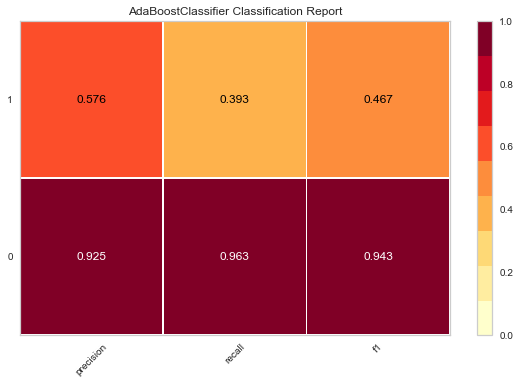

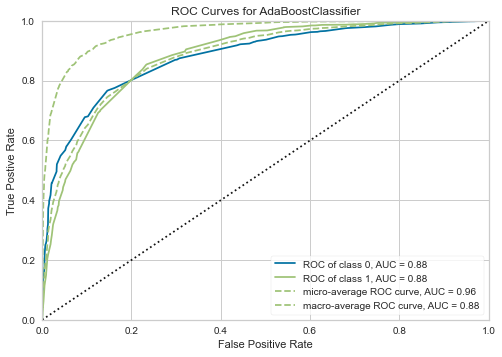

In [68]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 10, random_state=1))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 10, random_state=1))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [69]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['AdaBoosting'], 'accuracy': AdaBoost.score(X_test, y_test), 'recall': AdaBoost_Recall, 
                          'precision': AdaBoost_Precision, 'F1score': AdaBoost_F1_Score, 'roc': AdaBoost_ROC})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','F1score','roc']]
resultsDf

,Method,accuracy,recall,precision,F1score,roc
0,Logistic Regression,0.897670,0.262411,0.625192,0.369664,0.621050
0,Decision Tree,0.874078,0.499033,0.453959,0.475430,0.710767
0,Decision Tree-R,0.901946,0.499033,0.453959,0.475430,0.710767
0,Bagging,0.906517,0.489362,0.614575,0.544867,0.724869
0,AdaBoosting,0.872014,0.483559,0.445104,0.463535,0.702863


In [ ]:
#GradientBoost

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
GraBoost = GradientBoostingClassifier(n_estimators = 50,random_state=1)
GraBoost = GraBoost.fit(X_train, y_train)


0.903420819817163


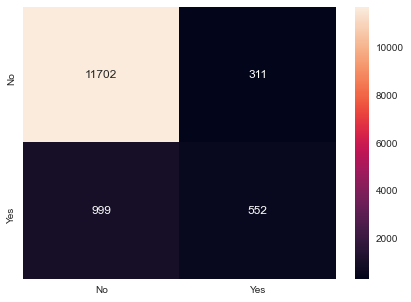

In [71]:
y_predict = GraBoost.predict(X_test)
print(GraBoost.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [72]:
GraBoost_Train_Acc = GraBoost.score(X_train, y_train)
GraBoost_Test_Acc = GraBoost.score(X_test, y_test)

print("Training accuracy",GraBoost_Train_Acc)
print("Testing accuracy",GraBoost_Test_Acc)

Training accuracy 0.9062786362056435
Testing accuracy 0.903420819817163


In [73]:
GraBoost_Recall = recall_score(y_test,y_predict)

GraBoost_Precision = precision_score(y_test,y_predict)

GraBoost_F1_Score = f1_score(y_test,y_predict)

GraBoost_ROC = roc_auc_score(y_test,y_predict)

print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Recall: 0.35589941972920697

Precision: 0.6396292004634995

F1 Score: 0.45733222866611434

Roc Auc Score: 0.6650053995341281


In [74]:
print('The confusion matrix for Gradiant Boosting \n\n')

print('True Positives (TP): we correctly predicted that they will take Term Deposit ', cm[1,1],'\n')

print('True Negatives (TN): we correctly predicted that they don''t take Term Deposit ', cm[0,0],'\n')

print('False Positives (FP): we incorrectly predicted that they will take Term Deposit (a "Type I error") ',cm[1,0] ,' Falsely predict positive Type I error \n')

print('False Negatives (FN): we incorrectly predicted that they don''t take Term Deposit (a "Type II error") ',cm[0,1],' Falsely predict negative Type II error \n')

The confusion matrix for Gradiant Boosting 


True Positives (TP): we correctly predicted that they will take Term Deposit  552 

True Negatives (TN): we correctly predicted that they dont take Term Deposit  11702 

False Positives (FP): we incorrectly predicted that they will take Term Deposit (a "Type I error")  999  Falsely predict positive Type I error 

False Negatives (FN): we incorrectly predicted that they dont take Term Deposit (a "Type II error")  311  Falsely predict negative Type II error 



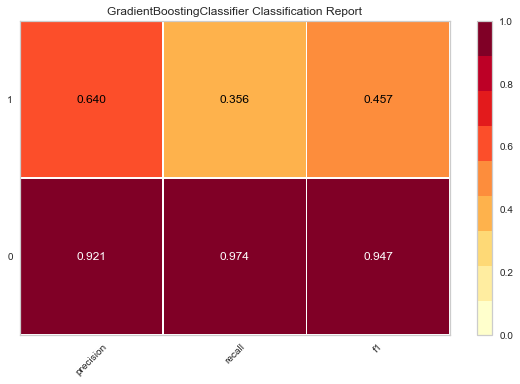

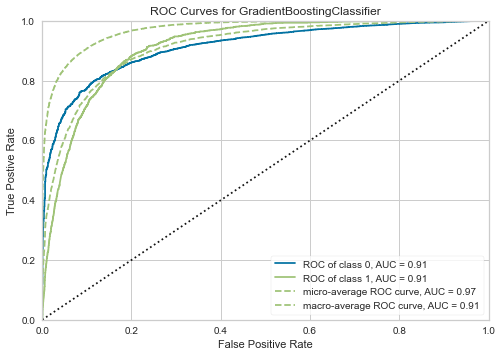

In [75]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [76]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': GraBoost_Test_Acc, 'recall': GraBoost_Recall, 
                          'precision': GraBoost_Precision, 'F1score': GraBoost_F1_Score, 'roc': GraBoost_ROC})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','F1score','roc']]
resultsDf

,Method,accuracy,recall,precision,F1score,roc
0,Logistic Regression,0.897670,0.262411,0.625192,0.369664,0.621050
0,Decision Tree,0.874078,0.499033,0.453959,0.475430,0.710767
0,Decision Tree-R,0.901946,0.499033,0.453959,0.475430,0.710767
0,Bagging,0.906517,0.489362,0.614575,0.544867,0.724869
0,AdaBoosting,0.872014,0.483559,0.445104,0.463535,0.702863
0,Gradient Boost,0.903421,0.355899,0.639629,0.457332,0.665005


In [ ]:
#Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.9069595989383663


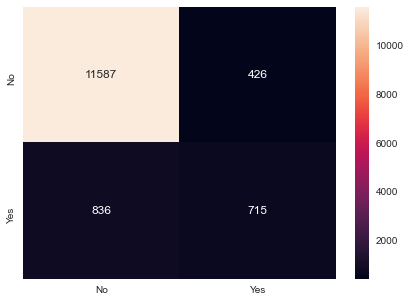

In [78]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [79]:
RF_Train_Acc = rfcl.score(X_train, y_train)
RF_Test_Acc  = rfcl.score(X_test, y_test)

print("Training accuracy",RF_Train_Acc)
print("Testing accuracy",RF_Test_Acc)

Training accuracy 0.9998104085695326
Testing accuracy 0.9069595989383663


In [80]:
RF_Recall = recall_score(y_test,y_predict)

RF_Precision = precision_score(y_test,y_predict)

RF_F1_Score = f1_score(y_test,y_predict)

RF_ROC = roc_auc_score(y_test,y_predict)

print("Recall:",RF_Recall)
print()
print("Precision:",RF_Precision)
print()
print("F1 Score:",RF_F1_Score)
print()
print("Roc Auc Score:",RF_ROC)

Recall: 0.46099290780141844

Precision: 0.6266432953549518

F1 Score: 0.5312035661218425

Roc Auc Score: 0.7127656622583219


In [81]:
print('The confusion matrix for Random Forest \n\n')

print('True Positives (TP): we correctly predicted that they will take Term Deposit ', cm[1,1],'\n')

print('True Negatives (TN): we correctly predicted that they don''t take Term Deposit ', cm[0,0],'\n')

print('False Positives (FP): we incorrectly predicted that they will take Term Deposit (a "Type I error") ',cm[1,0] ,' Falsely predict positive Type I error \n')

print('False Negatives (FN): we incorrectly predicted that they don''t take Term Deposit (a "Type II error") ',cm[0,1],' Falsely predict negative Type II error \n')

The confusion matrix for Random Forest 


True Positives (TP): we correctly predicted that they will take Term Deposit  715 

True Negatives (TN): we correctly predicted that they dont take Term Deposit  11587 

False Positives (FP): we incorrectly predicted that they will take Term Deposit (a "Type I error")  836  Falsely predict positive Type I error 

False Negatives (FN): we incorrectly predicted that they dont take Term Deposit (a "Type II error")  426  Falsely predict negative Type II error 



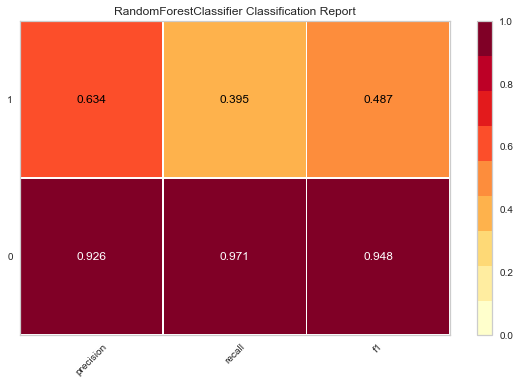

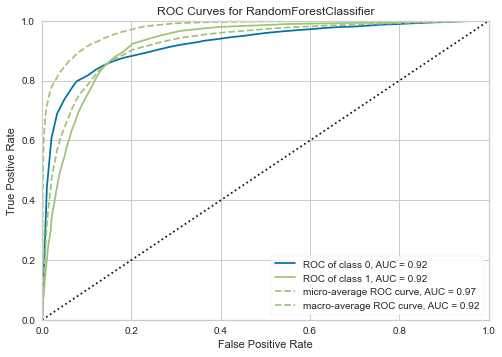

In [82]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [83]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': RF_Test_Acc, 'recall': RF_Recall, 
                          'precision': RF_Precision, 'F1score': RF_F1_Score, 'roc': RF_ROC})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','F1score','roc']]
resultsDf

,Method,accuracy,recall,precision,F1score,roc
0,Logistic Regression,0.897670,0.262411,0.625192,0.369664,0.621050
0,Decision Tree,0.874078,0.499033,0.453959,0.475430,0.710767
0,Decision Tree-R,0.901946,0.499033,0.453959,0.475430,0.710767
0,Bagging,0.906517,0.489362,0.614575,0.544867,0.724869
0,AdaBoosting,0.872014,0.483559,0.445104,0.463535,0.702863
0,Gradient Boost,0.903421,0.355899,0.639629,0.457332,0.665005
0,Random Forest,0.906960,0.460993,0.626643,0.531204,0.712766


In [ ]:
#Overall Bagging and Random Forest are the best model for prediction. 
#Random Forest has highest Accuracy and Good Recall, Precision, F1 Score and ROC of all the models
#Bagging has highest F1 Score and ROC and Good Accuracy, Recall and Precision of all the models


In [ ]:
# Let's look at different models and estimators in bagging and Random Forest 

In [84]:
#Bagging Classifier based on Decision Tree

list_estimators_n = [50, 100, 150, 200, 250]

for j in list_estimators_n:

    print()
    print("\n Decision Tree Bagging Estimators:", j)
    print()

    Bag_DT_Estimator = 'Bagging-DecisionTree-Estimator' + str(j)

    bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=j,random_state=1)
    bgcl = bgcl.fit(X_train, y_train)
    
    y_predict = bgcl.predict(X_test)
    
    Bag_Train_Acc = bgcl.score(X_train, y_train)
    Bag_Test_Acc  = bgcl.score(X_test, y_test)

    print("Training accuracy",Bag_Train_Acc)
    print()
    print("Testing accuracy",Bag_Test_Acc)
    print()
    
    Bag_Recall = recall_score(y_test,y_predict)

    Bag_Precision = precision_score(y_test,y_predict)

    Bag_F1_Score = f1_score(y_test,y_predict)

    Bag_ROC = roc_auc_score(y_test,y_predict)

    print("Recall:",Bag_Recall)
    print()
    print("Precision:",Bag_Precision)
    print()
    print("F1 Score:",Bag_F1_Score)
    print()
    print("Roc Auc Score:",Bag_ROC)
    print()
     
    
    #Store the accuracy results for each model in a dataframe for final comparison
    tempResultsDf = pd.DataFrame({'Method':[Bag_DT_Estimator], 'accuracy': bgcl.score(X_test, y_test), 'recall': Bag_Recall, 
                          'precision': Bag_Precision, 'F1score': Bag_F1_Score, 'roc': Bag_ROC})
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf = resultsDf[['Method', 'accuracy','recall','precision','F1score','roc']]

print(resultsDf)





 Decision Tree Bagging Estimators: 50

Training accuracy 0.9998104085695326

Testing accuracy 0.9065172515482158

Recall: 0.48936170212765956

Precision: 0.6145748987854251

F1 Score: 0.5448671931083993

Roc Auc Score: 0.7248689805901762



 Decision Tree Bagging Estimators: 100

Training accuracy 0.9999684014282555

Testing accuracy 0.9065909761132409

Recall: 0.501611863313991

Precision: 0.6116352201257862

F1 Score: 0.5511866808359901

Roc Auc Score: 0.7302448728040861



 Decision Tree Bagging Estimators: 150

Training accuracy 1.0

Testing accuracy 0.9071807726334414

Recall: 0.5080593165699548

Precision: 0.6137071651090342

F1 Score: 0.5559082892416225

Roc Auc Score: 0.7333853562788175



 Decision Tree Bagging Estimators: 200

Training accuracy 1.0

Testing accuracy 0.9065172515482158

Recall: 0.5061250805931657

Precision: 0.60994560994561

F1 Score: 0.5532064834390417

Roc Auc Score: 0.7321685088306709



 Decision Tree Bagging Estimators: 250

Training accuracy 1.0

Test

In [85]:
#Bagging Classifier based on Logistic Regression

list_estimators_n = [50, 100, 150, 200, 250]

list_estimators_base = [dTree, dTreeR, model]

for j in list_estimators_n:

    print()
    print("Logistic Reg Bagging Estimators:", j)
    print()

    Bag_DT_Estimator = 'Bagging-LogReg-Estimator' + str(j)

    bgcl = BaggingClassifier(base_estimator=model, n_estimators=j,random_state=1)
    bgcl = bgcl.fit(X_train, y_train)
    
    y_predict = bgcl.predict(X_test)
    
    Bag_Train_Acc = bgcl.score(X_train, y_train)
    Bag_Test_Acc  = bgcl.score(X_test, y_test)

    print("Training accuracy",Bag_Train_Acc)
    print()
    print("Testing accuracy",Bag_Test_Acc)
    print()
    
    Bag_Recall = recall_score(y_test,y_predict)

    Bag_Precision = precision_score(y_test,y_predict)

    Bag_F1_Score = f1_score(y_test,y_predict)

    Bag_ROC = roc_auc_score(y_test,y_predict)

    print("Recall:",Bag_Recall)
    print()
    print("Precision:",Bag_Precision)
    print()
    print("F1 Score:",Bag_F1_Score)
    print()
    print("Roc Auc Score:",Bag_ROC)
    print()

    #Store the accuracy results for each model in a dataframe for final comparison
    tempResultsDf = pd.DataFrame({'Method':[Bag_DT_Estimator], 'accuracy': Bag_Test_Acc, 'recall': Bag_Recall, 
                          'precision': Bag_Precision, 'F1score': Bag_F1_Score, 'roc': Bag_ROC})
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf = resultsDf[['Method', 'accuracy','recall','precision','F1score','roc']]




Logistic Reg Bagging Estimators: 50

Training accuracy 0.8981894018390368

Testing accuracy 0.897817752875258

Recall: 0.27143778207607994

Precision: 0.621861152141802

F1 Score: 0.3779174147217235

Roc Auc Score: 0.6250637674219575


Logistic Reg Bagging Estimators: 100

Training accuracy 0.8983157961260151

Testing accuracy 0.8975965791801829

Recall: 0.2688588007736944

Precision: 0.6205357142857143

F1 Score: 0.37516869095816463

Roc Auc Score: 0.6238158983473899


Logistic Reg Bagging Estimators: 150

Training accuracy 0.8981578032672923

Testing accuracy 0.8975228546151578

Recall: 0.2695035460992908

Precision: 0.6192592592592593

F1 Score: 0.3755615453728661

Roc Auc Score: 0.6240550278569374


Logistic Reg Bagging Estimators: 200

Training accuracy 0.8981262046955477

Testing accuracy 0.8975965791801829

Recall: 0.27079303675048355

Precision: 0.6194690265486725

F1 Score: 0.3768506056527591

Roc Auc Score: 0.6246581516059087


Logistic Reg Bagging Estimators: 250

Training 


Random Forest Estimators: 50

Training accuracy 0.9998104085695326

Testing accuracy 0.9069595989383663

Recall: 0.46099290780141844

Precision: 0.6266432953549518

F1 Score: 0.5312035661218425

Roc Auc Score: 0.7127656622583219
The confusion matrix for Bagging : Random-Forest-Estimator50 


True Positives (TP): we correctly predicted that they will take Term Deposit  715 

True Negatives (TN): we correctly predicted that they dont take Term Deposit  11587 

False Positives (FP): we incorrectly predicted that they will take Term Deposit (a "Type I error")  836  Falsely predict positive Type I error 

False Negatives (FN): we incorrectly predicted that they dont take Term Deposit (a "Type II error")  426  Falsely predict negative Type II error 


Random Forest Estimators: 100

Training accuracy 0.9999368028565109

Testing accuracy 0.9068121498083161

Recall: 0.46421663442940037

Precision: 0.6244579358196011

F1 Score: 0.5325443786982248

Roc Auc Score: 0.7140861745359355
The confusion

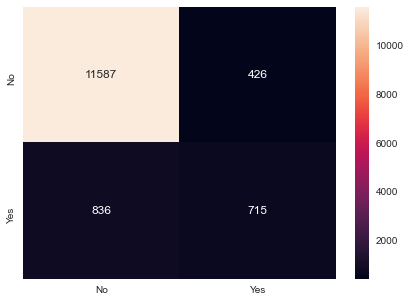

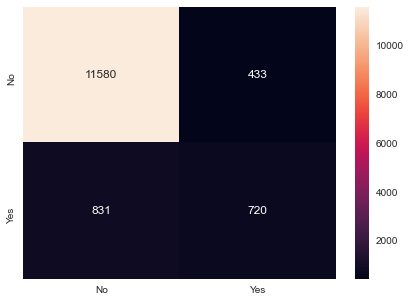

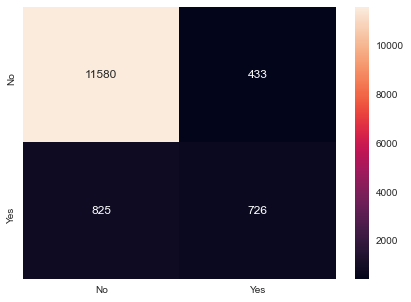

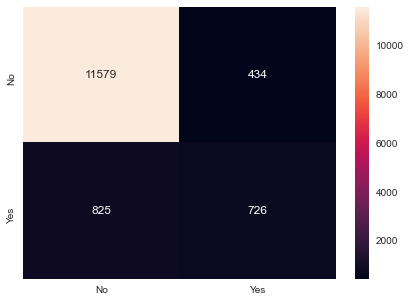

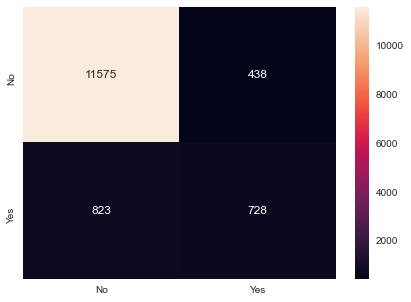

In [86]:
#Random Forest Classifier

list_estimators_n = [50, 100, 150, 200, 250]


for j in list_estimators_n:

    print()
    print("Random Forest Estimators:", j)
    print()

    Rand_DT_Estimator = 'Random-Forest-Estimator' + str(j)

    rfcl = RandomForestClassifier(n_estimators = j, random_state=1,max_features=12)
    rfcl = rfcl.fit(X_train, y_train)
    
    y_predict = rfcl.predict(X_test)
    cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g');
    
    RF_Train_Acc = rfcl.score(X_train, y_train)
    RF_Test_Acc  = rfcl.score(X_test, y_test)

    print("Training accuracy",RF_Train_Acc)
    print()
    print("Testing accuracy",RF_Test_Acc)
    print()

    
    RF_Recall = recall_score(y_test,y_predict)

    RF_Precision = precision_score(y_test,y_predict)

    RF_F1_Score = f1_score(y_test,y_predict)

    RF_ROC = roc_auc_score(y_test,y_predict)

    print("Recall:",RF_Recall)
    print()
    print("Precision:",RF_Precision)
    print()
    print("F1 Score:",RF_F1_Score)
    print()
    print("Roc Auc Score:",RF_ROC)

    print('The confusion matrix for Bagging :', Rand_DT_Estimator ,'\n\n')

    print('True Positives (TP): we correctly predicted that they will take Term Deposit ', cm[1,1],'\n')

    print('True Negatives (TN): we correctly predicted that they don''t take Term Deposit ', cm[0,0],'\n')

    print('False Positives (FP): we incorrectly predicted that they will take Term Deposit (a "Type I error") ',cm[1,0] ,' Falsely predict positive Type I error \n')

    print('False Negatives (FN): we incorrectly predicted that they don''t take Term Deposit (a "Type II error") ',cm[0,1],' Falsely predict negative Type II error \n')
    
    #Store the accuracy results for each model in a dataframe for final comparison
    tempResultsDf = pd.DataFrame({'Method':[Rand_DT_Estimator], 'accuracy': RF_Test_Acc, 'recall': RF_Recall, 
                          'precision': RF_Precision, 'F1score': RF_F1_Score, 'roc': RF_ROC})
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf = resultsDf[['Method', 'accuracy','recall','precision','F1score','roc']]




In [87]:
resultsDf

,Method,accuracy,recall,precision,F1score,roc
0,Logistic Regression,0.897670,0.262411,0.625192,0.369664,0.621050
0,Decision Tree,0.874078,0.499033,0.453959,0.475430,0.710767
0,Decision Tree-R,0.901946,0.499033,0.453959,0.475430,0.710767
0,Bagging,0.906517,0.489362,0.614575,0.544867,0.724869
0,AdaBoosting,0.872014,0.483559,0.445104,0.463535,0.702863
0,Gradient Boost,0.903421,0.355899,0.639629,0.457332,0.665005
0,Random Forest,0.906960,0.460993,0.626643,0.531204,0.712766
0,Bagging-DecisionTree-Estimator50,0.906517,0.489362,0.614575,0.544867,0.724869
0,Bagging-DecisionTree-Estimator100,0.906591,0.501612,0.611635,0.551187,0.730245
0,Bagging-DecisionTree-Estimator150,0.907181,0.508059,0.613707,0.555908,0.733385


In [ ]:
#Overall, the best model is bagging with Decision Tree and 250 Estimators
#Method	accuracy	recall	precision	F1score	roc
#Bagging-DecisionTree-Estimator250	0.907181	0.508704	0.613530	0.556221	0.733666



Decision Tree Bagging Estimators: 250

Training accuracy 1.0

Testing accuracy 0.9071807726334414

Recall: 0.5087040618955513

Precision: 0.6135303265940902

F1 Score: 0.5562213605921749

Roc Auc Score: 0.7336661073649903



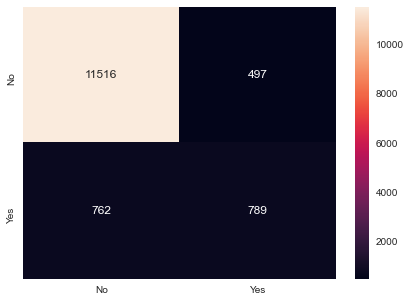

In [88]:
print()
print("Decision Tree Bagging Estimators: 250")
print()

Bag_DT_Estimator = 'Bagging-DecisionTree-Estimator250'

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=250,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

y_predict = bgcl.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
              columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Bag_Train_Acc = bgcl.score(X_train, y_train)
Bag_Test_Acc  = bgcl.score(X_test, y_test)

print("Training accuracy",Bag_Train_Acc)
print()
print("Testing accuracy",Bag_Test_Acc)
print()

Bag_Recall = recall_score(y_test,y_predict)

Bag_Precision = precision_score(y_test,y_predict)

Bag_F1_Score = f1_score(y_test,y_predict)

Bag_ROC = roc_auc_score(y_test,y_predict)

print("Recall:",Bag_Recall)
print()
print("Precision:",Bag_Precision)
print()
print("F1 Score:",Bag_F1_Score)
print()
print("Roc Auc Score:",Bag_ROC)
print()



In [89]:

print('The confusion matrix for Bagging :', Bag_DT_Estimator ,'\n')

print('True Positives (TP): we correctly predicted that they will take Term Deposit ', cm[1,1],'\n')

print('True Negatives (TN): we correctly predicted that they don''t take Term Deposit ', cm[0,0],'\n')

print('False Positives (FP): we incorrectly predicted that they will take Term Deposit (a "Type I error") ',cm[1,0] ,' Falsely predict positive Type I error \n')

print('False Negatives (FN): we incorrectly predicted that they don''t take Term Deposit (a "Type II error") ',cm[0,1],' Falsely predict negative Type II error \n')
    

The confusion matrix for Bagging : Bagging-DecisionTree-Estimator250 

True Positives (TP): we correctly predicted that they will take Term Deposit  789 

True Negatives (TN): we correctly predicted that they dont take Term Deposit  11516 

False Positives (FP): we incorrectly predicted that they will take Term Deposit (a "Type I error")  762  Falsely predict positive Type I error 

False Negatives (FN): we incorrectly predicted that they dont take Term Deposit (a "Type II error")  497  Falsely predict negative Type II error 



For Bagging classifier Estimators: 250


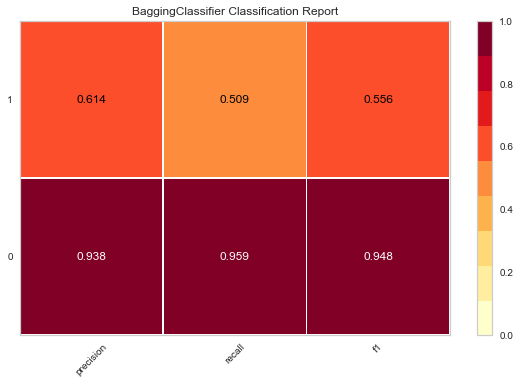

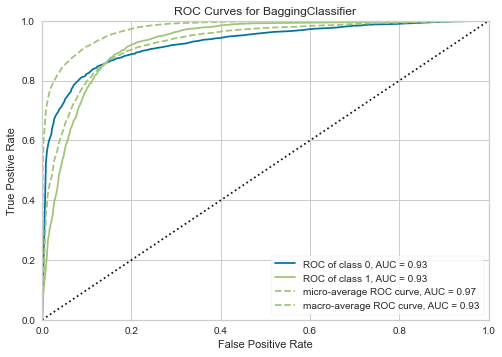

In [90]:

    print("For Bagging classifier Estimators: 250")
    # Visualize model performance with yellowbrick library
    viz = ClassificationReport(BaggingClassifier(base_estimator=dTree, n_estimators=250, random_state=1))
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()

    roc = ROCAUC(BaggingClassifier(base_estimator=dTree,n_estimators=250, random_state=1))
    roc.fit(X_train, y_train)
    roc.score(X_test, y_test)
    roc.show()